In [18]:
from einops import rearrange
from kaggle_arc_24.dataset import Arc24Dataset
import numpy as np
import albumentations as A
import matplotlib.pyplot as plt
import cv2

In [19]:
train_dataset = Arc24Dataset(
    data_path=r'C:\Users\tommy\Developer\Kaggle-ARC-24\arc-prize-2024\arc-agi_training_challenges.json',
    solution_path=r'C:\Users\tommy\Developer\Kaggle-ARC-24\arc-prize-2024\arc-agi_training_solutions.json'
)

val_dataset = Arc24Dataset(
    data_path=r'C:\Users\tommy\Developer\Kaggle-ARC-24\arc-prize-2024\arc-agi_evaluation_challenges.json',
    solution_path=r'C:\Users\tommy\Developer\Kaggle-ARC-24\arc-prize-2024\arc-agi_evaluation_solutions.json'
)

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

In [56]:
max_n_el = 0
min= float('inf')
pad_if_needed = A.PadIfNeeded(30, 30, border_mode=cv2.BORDER_CONSTANT, value=0)

for idx, r in train_dataset.df.iterrows():
    train_input = r.train_input

    n_samples = len(train_input)
    tasks = np.zeros((n_samples, 30, 30))
    for n in range(n_samples):
        sample = train_input[n]
        task = np.array(sample)
        task = pad_if_needed(image=task)['image']
        tasks[n] = task

    n_empty_tasks_to_add = 10 - n_samples

    if n_empty_tasks_to_add > 0:
        pad_tasks = np.zeros((n_empty_tasks_to_add, 30, 30))
        tasks = np.concatenate((tasks, pad_tasks))
    assert tasks.shape[0] == 10

In [54]:
tasks.shape

(10, 30, 30)

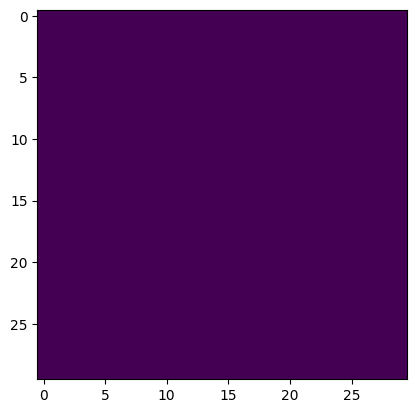

In [52]:
plt.imshow(tasks[-1])

In [ ]:
# we can see that there are at least 2 task per mini-challenge and at most 10 tasks. Each train_input task has its own correspective train_output.
# we also know that the min dimension is 1x1 and the max is 30x30.
# with this knowledge we can build a Dataset that returns batches of data of shape [N, 10, 30, 30]. We have to apply some preprocessing to the data, specifically padding width and height if the dimension is smaller than 30x30.